# Project Title
---

Group Name

Team members:
- Waseem Mohammed
- Abdulla Ebrahim


## Introduction 
__Introduction to the topic__ 

    ...

---

## Problem Statement

    ...

## Objectives:
__Questions that will guide the analysis to solve the problem__
-How does the gni affect life expectancy of a country
-How does the population relate to GNI
-What countries are similar but yet they differ due to any of these reasons
-What steps or methods can taken in order to achieve positive growth
    ...

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [3]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
import warnings

sns.set_palette("husl")
%matplotlib inline  


In [4]:

# ===LOAD DATA WITH EXACT PATHS ===
gni_path = "world-development-statistics/gni_per_cap_atlas_method_con2021.csv"
population_path = "world-development-statistics/population.csv"
life_path = "world-development-statistics/life_expectancy.csv"

# Load datasets
gni_df = pd.read_csv(gni_path)
population_df = pd.read_csv(population_path)
life_df = pd.read_csv(life_path)

print("Data loaded successfully!")
print(f"GNI data shape: {gni_df.shape}")
print(f"Population data shape: {population_df.shape}")
print(f"Life Expectancy data shape: {life_df.shape}")


Data loaded successfully!
GNI data shape: (191, 252)
Population data shape: (197, 302)
Life Expectancy data shape: (195, 302)


In [5]:
# === DATA EXPLORATION ===
print("\n=== FIRST LOOK AT EACH DATASET ===")

print("\nLife Expectancy data (first 3 rows):")
print(life_df.head(3))

print("\nGNI data (first 3 rows):")
print(gni_df.head(3))

print("\nPopulation data (first 3 rows):")
print(population_df.head(3))

# Check column names to understand structure
print(f"\nLife Expectancy columns: {life_df.columns.tolist()}")
print(f"GNI columns: {gni_df.columns.tolist()}")
print(f"Population columns: {population_df.columns.tolist()}")



=== FIRST LOOK AT EACH DATASET ===

Life Expectancy data (first 3 rows):
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data (first 3 rows):
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207

In [14]:
# Check if data is in wide format (countries × years)
print("=== DATA STRUCTURE ANALYSIS ===")

# Sample of what the data looks like
print("Life Expectancy data sample:")
print(life_df.head(3))

print("\nGNI data sample:")
print(gni_df.head(3))

# Check if 'country' is the first column and years are other columns
if 'country' in life_df.columns:
    print(f"✅ country column found. Number of countries: {life_df['country'].nunique()}")
    
    # Get year columns (assuming they're numeric)
    year_columns = [col for col in life_df.columns if col.isdigit()]
    print(f"✅ Year columns found: {len(year_columns)} years from {min(year_columns)} to {max(year_columns)}")

=== DATA STRUCTURE ANALYSIS ===
Life Expectancy data sample:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data sample:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   

   ... 

In [16]:
# Check for missing values
print("=== MISSING VALUES ===")
print("Life Expectancy missing values:")
print(life_df.isnull().sum())

print("\nGNI missing values:")
print(gni_df.isnull().sum())

# Check for duplicates
print("\n=== DUPLICATE CHECK ===")
print(f"Life Expectancy duplicates: {life_df.duplicated().sum()}")
print(f"GNI duplicates: {gni_df.duplicated().sum()}")

# Basic statistics for numeric columns
print("\n=== BASIC STATISTICS ===")
# For wide format data, we need to look at the values across years
# Let's examine one year column as example
if '2020' in life_df.columns:
    print("Life Expectancy 2020 stats:")
    print(life_df['2020'].describe())

=== MISSING VALUES ===
Life Expectancy missing values:
country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

GNI missing values:
country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

=== DUPLICATE CHECK ===
Life Expectancy duplicates: 0
GNI duplicates: 0

=== BASIC STATISTICS ===
Life Expectancy 2020 stats:
count    186.000000
mean      72.446237
std        6.753106
min       52.000000
25%       67.425000
50%       73.200000
75%       77.000000
max       84.900000
Name: 2020, dtype: float64


### Data Handling: 
__Cleaning, transforming, and combining data__

In [19]:
# Reshaping
def reshape_wide_to_long(df, value_name):
    """
    Convert from wide format (countries × years) to long format
    """
    # Melt the dataframe: keep country, melt year columns
    long_df = df.melt(id_vars=['country'], 
                     var_name='Year', 
                     value_name=value_name)
    
    # Convert Year to integer
    long_df['Year'] = long_df['Year'].astype(int)
    
    # Remove rows with missing values
    long_df = long_df.dropna()
    
    print(f"✅ {value_name}: {long_df['country'].nunique()} countries, {long_df['Year'].nunique()} years")
    return long_df

# Apply to all datasets
print("=== RESHAPING DATA ===")
life_exp_long = reshape_wide_to_long(life_df, 'Life_Expectancy')
gni_long = reshape_wide_to_long(gni_df, 'GNI_per_Capita')
population_long = reshape_wide_to_long(population_df, 'Population')

=== RESHAPING DATA ===
✅ Life_Expectancy: 195 countries, 301 years
✅ GNI_per_Capita: 191 countries, 251 years
✅ Population: 197 countries, 301 years


In [33]:
# Merge step by step
print("=== MERGING DATASETS ===")

# First merge: Life Expectancy + GNI
merged_df = pd.merge(life_exp_long, gni_long, on=['country', 'Year'], how='inner')

# Second merge: Add Population
merged_df = pd.merge(merged_df, population_long, on=['country', 'Year'], how='inner')

print(f"✅ Merged dataset shape: {merged_df.shape}")
print(f"✅ Countries in merged data: {merged_df['country'].nunique()}")
print(f"✅ Years covered: {merged_df['Year'].min()} to {merged_df['Year'].max()}")

# Quick check
print("\n=== MERGED DATA SAMPLE ===")
print(merged_df)

=== MERGING DATASETS ===
✅ Merged dataset shape: (46604, 5)
✅ Countries in merged data: 190
✅ Years covered: 1800 to 2050

=== MERGED DATA SAMPLE ===
                    country  Year  Life_Expectancy GNI_per_Capita Population
0               Afghanistan  1800             28.2          207.0      3.28M
1                    Angola  1800             27.0          517.0      1.57M
2                   Albania  1800             35.4          207.0       400k
3      United Arab Emirates  1800             30.7          738.0      40.2k
4                 Argentina  1800             33.2          794.0       534k
...                     ...   ...              ...            ...        ...
46599                 Samoa  2050             74.3           6440       320k
46600                 Yemen  2050             72.2           1730      55.3M
46601          South Africa  2050             70.9           9220      73.5M
46602                Zambia  2050             69.8           1520      37.5M
466

In [37]:
def to_int(input1):
    """convert string (like 12k, 13.4k) to int """
    if type(input1) == "int":
        return input1
    if "k" in input1:
        return int(float(input1[:-1]) * 1000)
    elif "M" in input1:
        return int(float(input1[:-1]) * 1_000_000)
    elif "B" in input1:
        return int(float(input1[:-1]) * 1_000_000_000)
    else:
        return(int(input1))
def to_float(input1):
    """convert string (like 12k, 13.4k) to int """
    if type(input1) == "float":
        return input1
    if "k" in input1:
        return float(input1[:-1]) * 1000
    elif "M" in input1:
        return float(input1[:-1]) * 1_000_000
    elif "B" in input1:
        return float(input1[:-1]) * 1_000_000_000
    else:
        return(float(input1))

In [40]:
print(merged_df.columns)
result = []
for value1 in merged_df['GNI_per_Capita']:
    result.append(to_float(str(value1)))
merged_df["GNI_per_Capita"] = result
result = []
for value1 in merged_df['Population']:
    result.append(to_int(str(value1)))
merged_df["Population"] = result
print(merged_df.dtypes)

Index(['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Population'], dtype='object')
country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population           int64
dtype: object


### Analysis: 
__Answering the objectives through data analysis__



In [39]:
print(merged_df.dtypes)
print(merged_df.columns)

country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population           int64
dtype: object
Index(['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Population'], dtype='object')


In [41]:
merged_df

,country,Year,Life_Expectancy,GNI_per_Capita,Population
0,Afghanistan,1800,28.2,207.0,3280000
1,Angola,1800,27.0,517.0,1570000
2,Albania,1800,35.4,207.0,400000
3,United Arab Emirates,1800,30.7,738.0,40200
4,Argentina,1800,33.2,794.0,534000
...,...,...,...,...,...
46599,Samoa,2050,74.3,6440.0,320000
46600,Yemen,2050,72.2,1730.0,55300000
46601,South Africa,2050,70.9,9220.0,73500000
46602,Zambia,2050,69.8,1520.0,37500000


In [42]:
merged_df.describe(include="all")

,country,Year,Life_Expectancy,GNI_per_Capita,Population
count,46604,46604.000000,46604.000000,46604.000000,4.660400e+04
unique,190,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN
freq,251,NaN,NaN,NaN,NaN
mean,NaN,1925.536220,47.719158,5170.894837,1.800181e+07
std,NaN,72.374689,18.642026,12818.065287,8.464023e+07
min,NaN,1800.000000,1.010000,28.000000,2.260000e+03
25%,NaN,1863.000000,32.000000,402.000000,4.590000e+05
50%,NaN,1926.000000,39.100000,884.500000,2.300000e+06
75%,NaN,1988.000000,66.300000,3190.000000,8.690000e+06


In [43]:
# Comprehensive data quality check
def assess_data_quality(df):
    print("=== DATA QUALITY ASSESSMENT ===")
    
    # 1. Check for missing values
    missing_data = df.isnull().sum()
    print("Missing values per column:")
    for col, missing_count in missing_data.items():
        if missing_count > 0:
            print(f"  {col}: {missing_count} missing ({missing_count/len(df)*100:.2f}%)")
    
    # 2. Check for zeros or negative values (where inappropriate)
    print("\n=== VALUE RANGE CHECKS ===")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col != 'Year':  # Skip year column
            min_val = df[col].min()
            max_val = df[col].max()
            print(f"  {col}: {min_val:.2f} to {max_val:.2f}")
            
            # Flag potential issues
            if min_val < 0:
                print(f"    ⚠️  Negative values found in {col}")
            if min_val == 0 and col != 'Year':
                print(f"    ⚠️  Zero values found in {col}")
    
    # 3. Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    
    return df

merged_df = assess_data_quality(merged_df)

=== DATA QUALITY ASSESSMENT ===
Missing values per column:

=== VALUE RANGE CHECKS ===
  Life_Expectancy: 1.01 to 88.60
  GNI_per_Capita: 28.00 to 142000.00
  Population: 2260.00 to 1670000000.00

Duplicate rows: 0


In [48]:
# Create useful derived variables for analysis
print("=== CREATING DERIVED VARIABLES ===")

# Log transformation for GNI (often follows log-normal distribution)
merged_df['Log_GNI'] = np.log(merged_df['GNI_per_Capita'] + 1)

# Population in millions for easier reading
merged_df['Population_Millions'] = merged_df['Population'] / 1000000

# Life Expectancy categories
def categorize_life_exp(age):
    if age < 60: return 'Low (<60)'
    elif age < 70: return 'Medium (60-70)'
    elif age < 80: return 'High (70-80)'
    else: return 'Very High (80+)'

merged_df['Life_Exp_Category'] = merged_df['Life_Expectancy'].apply(categorize_life_exp)

# GNI income groups (World Bank classification)
def income_group(gni):
    if gni < 1036: return 'Low Income'
    elif gni < 4045: return 'Lower Middle Income'
    elif gni < 12535: return 'Upper Middle Income'
    else: return 'High Income'

merged_df['Income_Group'] = merged_df['GNI_per_Capita'].apply(income_group)

print("✅ Derived variables created!")
print(merged_df[['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Income_Group']])

=== CREATING DERIVED VARIABLES ===
✅ Derived variables created!
                    country  Year  Life_Expectancy  GNI_per_Capita  \
0               Afghanistan  1800             28.2           207.0   
1                    Angola  1800             27.0           517.0   
2                   Albania  1800             35.4           207.0   
3      United Arab Emirates  1800             30.7           738.0   
4                 Argentina  1800             33.2           794.0   
...                     ...   ...              ...             ...   
46599                 Samoa  2050             74.3          6440.0   
46600                 Yemen  2050             72.2          1730.0   
46601          South Africa  2050             70.9          9220.0   
46602                Zambia  2050             69.8          1520.0   
46603              Zimbabwe  2050             67.6          1880.0   

              Income_Group  
0               Low Income  
1               Low Income  
2       

---

In [54]:
# Save the cleaned, merged dataset
merged_df.to_csv('cleaned_development_data.csv', index=False)
print("✅ Cleaned data saved to 'cleaned_development_data.csv'")

# Also save just the latest year for focused analysis
latest_year = merged_df['Year'].max()
latest_data = merged_df[merged_df['Year'] == latest_year]
latest_data.to_csv(f'development_data_{latest_year}.csv', index=False)
print(f"✅ Latest year ({latest_year}) data saved separately")

✅ Cleaned data saved to 'cleaned_development_data.csv'
✅ Latest year (2050) data saved separately


In [55]:
# Comprehensive summary statistics
print("=== BASIC STATISTICAL SUMMARY ===")

# For numeric columns
numeric_summary = merged_df.describe()
print(numeric_summary)

# For categorical columns
categorical_cols = ['Life_Exp_Category', 'Income_Group']
for col in categorical_cols:
    if col in merged_df.columns:
        print(f"\n=== {col} DISTRIBUTION ===")
        print(merged_df[col].value_counts())

=== BASIC STATISTICAL SUMMARY ===
               Year  Life_Expectancy  GNI_per_Capita    Population  \
count  46604.000000     46604.000000    46604.000000  4.660400e+04   
mean    1925.536220        47.719158     5170.894837  1.800181e+07   
std       72.374689        18.642026    12818.065287  8.464023e+07   
min     1800.000000         1.010000       28.000000  2.260000e+03   
25%     1863.000000        32.000000      402.000000  4.590000e+05   
50%     1926.000000        39.100000      884.500000  2.300000e+06   
75%     1988.000000        66.300000     3190.000000  8.690000e+06   
max     2050.000000        88.600000   142000.000000  1.670000e+09   

            Log_GNI  Population_Millions  
count  46604.000000         46604.000000  
mean       7.147447            18.001808  
std        1.516574            84.640228  
min        3.367296             0.002260  
25%        5.998937             0.459000  
50%        6.786152             2.300000  
75%        8.068090             8.

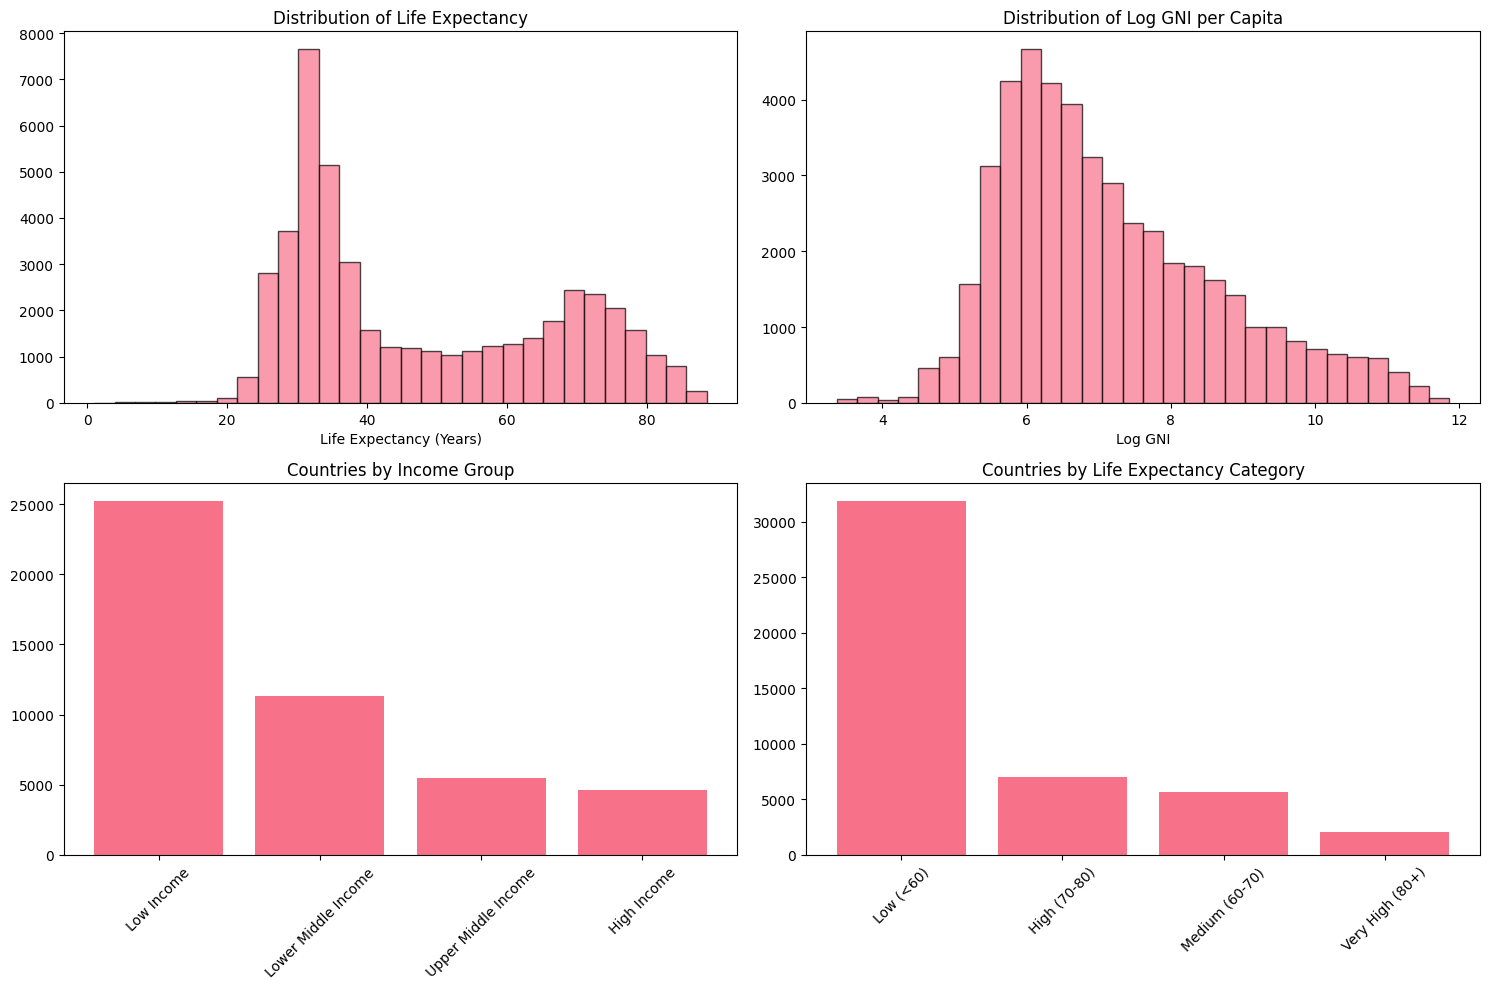

In [56]:
# Distribution of key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Life Expectancy distribution
axes[0,0].hist(merged_df['Life_Expectancy'].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Life Expectancy')
axes[0,0].set_xlabel('Life Expectancy (Years)')

# GNI distribution (log scale often better)
axes[0,1].hist(merged_df['Log_GNI'].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of Log GNI per Capita')
axes[0,1].set_xlabel('Log GNI')

# Income groups
income_counts = merged_df['Income_Group'].value_counts()
axes[1,0].bar(income_counts.index, income_counts.values)
axes[1,0].set_title('Countries by Income Group')
axes[1,0].tick_params(axis='x', rotation=45)

# Life expectancy categories
life_counts = merged_df['Life_Exp_Category'].value_counts()
axes[1,1].bar(life_counts.index, life_counts.values)
axes[1,1].set_title('Countries by Life Expectancy Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...